This Notebook is for cleaning the data sets, EDA, and creating custom functions.

Importing needed libraries:

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt




Importing and cleaning first data set(Tree census):

In [2]:
tree_df = pd.read_csv("new_york_tree_census_2015.csv")
tree_df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,...,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017


In [3]:
#keeping only living trees:
remove_values = ["Dead", "Stump"]
alive_df = tree_df[~tree_df["status"].isin(remove_values)]
alive_df.describe()

,tree_id,block_id,tree_dbh,stump_diam,zipcode,cb_num,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp
count,652173.000000,652173.000000,652173.000000,652173.0,652173.000000,652173.000000,652173.000000,652173.000000,652173.000000,652173.000000,6.521730e+05,652173.000000,652173.000000,6.521730e+05,652173.000000
mean,365689.637480,313611.213077,11.709485,0.0,10914.407958,343.738388,3.360979,29.992976,50.818103,20.620725,3.407340e+06,40.700991,-73.924587,1.005133e+06,194699.696220
std,208194.926983,114775.077889,8.634239,0.0,656.868397,115.808325,1.167572,14.343667,18.928937,7.378427,1.176612e+06,0.090268,0.123844,3.435720e+04,32886.140551
min,3.000000,100002.000000,0.000000,0.0,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200
25%,186886.000000,221491.000000,5.000000,0.0,10314.000000,303.000000,3.000000,19.000000,33.000000,14.000000,3.012000e+06,40.631725,-73.980973,9.895259e+05,169441.751400
50%,367204.000000,319886.000000,10.000000,0.0,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700287,-73.913449,1.008235e+06,194444.837500
75%,546632.000000,404665.000000,16.000000,0.0,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103300e+06,40.761999,-73.835219,1.029902e+06,216940.389000
max,722694.000000,999999.000000,425.000000,0.0,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100


In [4]:
#dropping unneeded columns:
filtered_df = alive_df.drop(['created_at', 'stump_diam', 'status', 'user_type', 'sidewalk', 'guards', 'steward', 'st_assem', 
                             'st_senate', 'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                             'brch_light', 'brch_shoe', 'brch_other'], axis=1)
filtered_df.head()

,tree_id,block_id,tree_dbh,curb_loc,health,spc_latin,spc_common,problems,address,zipcode,...,boroname,cncldist,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,10,OnCurb,Good,Fraxinus pennsylvanica,green ash,Stones,76-046 164 STREET,11366,...,Queens,24,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,9,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,BranchLights,72-020 32 AVENUE,11370,...,Queens,25,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,7,OnCurb,Good,Pyrus calleryana,Callery pear,BranchLights,153-026 119 AVENUE,11434,...,Queens,28,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,10,OnCurb,Good,Pyrus calleryana,Callery pear,NaN,89 89 STREET,11209,...,Brooklyn,43,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,4,OnCurb,Good,Prunus virginiana,'Schubert' chokecherry,BranchLights,559 BEACH 68 STREET,11692,...,Queens,31,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017


Addressing null or unclear values:

In [5]:
filtered_df.isnull().sum()

tree_id            0
block_id           0
tree_dbh           0
curb_loc           0
health             1
spc_latin          5
spc_common         5
problems      426329
address            0
zipcode            0
zip_city           0
cb_num             0
borocode           0
boroname           0
cncldist           0
nta                0
nta_name           0
boro_ct            0
state              0
latitude           0
longitude          0
x_sp               0
y_sp               0
dtype: int64

In [6]:
filtered_df.dropna(subset=["health", "spc_latin", "spc_common"], inplace=True)

In [7]:
filtered_df["problems"] = filtered_df["problems"].fillna("no problems")
filtered_df.head()

,tree_id,block_id,tree_dbh,curb_loc,health,spc_latin,spc_common,problems,address,zipcode,...,boroname,cncldist,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,10,OnCurb,Good,Fraxinus pennsylvanica,green ash,Stones,76-046 164 STREET,11366,...,Queens,24,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,9,OnCurb,Good,Gleditsia triacanthos var. inermis,honeylocust,BranchLights,72-020 32 AVENUE,11370,...,Queens,25,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,7,OnCurb,Good,Pyrus calleryana,Callery pear,BranchLights,153-026 119 AVENUE,11434,...,Queens,28,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,10,OnCurb,Good,Pyrus calleryana,Callery pear,no problems,89 89 STREET,11209,...,Brooklyn,43,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,4,OnCurb,Good,Prunus virginiana,'Schubert' chokecherry,BranchLights,559 BEACH 68 STREET,11692,...,Queens,31,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017


In [8]:
filtered_df["zipcode"].unique()

array([11366, 11370, 11434, 11209, 11692, 10031, 11207, 11219, 11421,
       10474, 11419, 10308, 10001, 10312, 11234, 10305, 11201, 11233,
       11411, 11220, 10009, 11372, 11432, 10314, 10461, 10309, 11367,
       11205, 10025, 11374, 11105, 11217, 10458, 11001, 10459, 11364,
       11379, 11691, 11004, 11358, 11238, 11213, 10470, 11356, 11103,
       11361, 10007, 11385, 11355, 11230, 10469, 10468, 10032, 11426,
       10304, 10463, 11206, 10462, 11216, 11208, 10465, 11375, 11429,
       11365, 11435, 11218, 10034, 11414, 11412, 11377, 11223, 11427,
       11204, 11357, 10022, 11215, 11428, 10036, 10456, 10024, 11221,
       10467, 10026, 11420, 11423, 10038, 11231, 11369, 11413, 10453,
       11210, 11436, 10307, 10475, 11229, 11363, 11040, 10003, 10457,
       11212, 11373, 11360, 11418, 11226, 10301, 10473, 10472, 11225,
       10302, 11422, 11354, 11236, 11106, 10013, 11214, 10452, 11378,
       10466, 10012,    83, 10310, 11694, 10002, 11224, 10464, 10035,
       11415, 10306,

In [9]:
filtered_df = filtered_df[filtered_df["zipcode"] != 83]
filtered_df["zipcode"].unique()

array([11366, 11370, 11434, 11209, 11692, 10031, 11207, 11219, 11421,
       10474, 11419, 10308, 10001, 10312, 11234, 10305, 11201, 11233,
       11411, 11220, 10009, 11372, 11432, 10314, 10461, 10309, 11367,
       11205, 10025, 11374, 11105, 11217, 10458, 11001, 10459, 11364,
       11379, 11691, 11004, 11358, 11238, 11213, 10470, 11356, 11103,
       11361, 10007, 11385, 11355, 11230, 10469, 10468, 10032, 11426,
       10304, 10463, 11206, 10462, 11216, 11208, 10465, 11375, 11429,
       11365, 11435, 11218, 10034, 11414, 11412, 11377, 11223, 11427,
       11204, 11357, 10022, 11215, 11428, 10036, 10456, 10024, 11221,
       10467, 10026, 11420, 11423, 10038, 11231, 11369, 11413, 10453,
       11210, 11436, 10307, 10475, 11229, 11363, 11040, 10003, 10457,
       11212, 11373, 11360, 11418, 11226, 10301, 10473, 10472, 11225,
       10302, 11422, 11354, 11236, 11106, 10013, 11214, 10452, 11378,
       10466, 10012, 10310, 11694, 10002, 11224, 10464, 10035, 11415,
       10306, 11222,

In [10]:
filtered_df.isnull().sum()

tree_id       0
block_id      0
tree_dbh      0
curb_loc      0
health        0
spc_latin     0
spc_common    0
problems      0
address       0
zipcode       0
zip_city      0
cb_num        0
borocode      0
boroname      0
cncldist      0
nta           0
nta_name      0
boro_ct       0
state         0
latitude      0
longitude     0
x_sp          0
y_sp          0
dtype: int64

In [11]:
#dropping more unneeded columns:
tree_df = filtered_df.drop(["block_id", "state", "cncldist", "nta", "boro_ct", "spc_latin", "address", "zip_city"], axis=1)
tree_df = tree_df.reset_index()
tree_df.head()

,index,tree_id,tree_dbh,curb_loc,health,spc_common,problems,zipcode,cb_num,borocode,boroname,nta_name,latitude,longitude,x_sp,y_sp
0,0,606945,10,OnCurb,Good,green ash,Stones,11366,408,4,Queens,Kew Gardens Hills,40.724339,-73.805180,1.038250e+06,203232.9417
1,1,160321,9,OnCurb,Good,honeylocust,BranchLights,11370,403,4,Queens,Jackson Heights,40.756626,-73.894167,1.013571e+06,214953.6472
2,2,541347,7,OnCurb,Good,Callery pear,BranchLights,11434,412,4,Queens,Baisley Park,40.679777,-73.788463,1.042923e+06,187008.2671
3,3,613930,10,OnCurb,Good,Callery pear,no problems,11209,310,3,Brooklyn,Bay Ridge,40.622743,-74.037543,9.738279e+05,166160.5847
4,4,18353,4,OnCurb,Good,'Schubert' chokecherry,BranchLights,11692,414,4,Queens,Hammels-Arverne-Edgemere,40.596514,-73.797622,1.040452e+06,156667.5017


Creating a function to make a quantitative tree health score:

In [12]:
tree_df["health"].unique()

array(['Good', 'Fair', 'Poor'], dtype=object)

In [13]:
def tree_health_score(health: str) -> int:
    """
    Args:
    health (str): health column lists status as "Good", "Fair", and "Poor"
    
    Returns:
    int: a score where Good =3, Fair = 2, and Poor = 1
    returns 0 if input is not recognized or missing
    """
    scores = {"Good": 3, "Fair": 2, "Poor": 1}
    return scores.get(health, 0)

#creating new column for health score:
tree_df["health_score"] = tree_df["health"].apply(tree_health_score)
tree_df.head()

,index,tree_id,tree_dbh,curb_loc,health,spc_common,problems,zipcode,cb_num,borocode,boroname,nta_name,latitude,longitude,x_sp,y_sp,health_score
0,0,606945,10,OnCurb,Good,green ash,Stones,11366,408,4,Queens,Kew Gardens Hills,40.724339,-73.805180,1.038250e+06,203232.9417,3
1,1,160321,9,OnCurb,Good,honeylocust,BranchLights,11370,403,4,Queens,Jackson Heights,40.756626,-73.894167,1.013571e+06,214953.6472,3
2,2,541347,7,OnCurb,Good,Callery pear,BranchLights,11434,412,4,Queens,Baisley Park,40.679777,-73.788463,1.042923e+06,187008.2671,3
3,3,613930,10,OnCurb,Good,Callery pear,no problems,11209,310,3,Brooklyn,Bay Ridge,40.622743,-74.037543,9.738279e+05,166160.5847,3
4,4,18353,4,OnCurb,Good,'Schubert' chokecherry,BranchLights,11692,414,4,Queens,Hammels-Arverne-Edgemere,40.596514,-73.797622,1.040452e+06,156667.5017,3


Creating a function that will take the input of any boundary column, and return the number of unique tree species per area of the specified boundary:

In [14]:
def count_unique_species(boundary_column):
    return tree_df.groupby(boundary_column)["spc_common"].nunique().reset_index(name = "unique_species_count")

count_unique_species("cb_num")

,cb_num,unique_species_count
0,101,54
1,102,80
2,103,92
3,104,57
4,105,48
5,106,73
6,107,84
7,108,89
8,109,85
9,110,85


Creating function to group by any boundary column, and return average health score, average size(diameter), and count of trees in each area:

In [15]:
def group_by_geography(boundary_column):
    
    """
        agg these:
        avg health_score
        avg tree_dbh
        sum count of trees spc_common
    """
    grouped = tree_df.groupby(boundary_column).agg({"health_score": "mean", "tree_dbh": "mean", "spc_common": "count"})
    return grouped

group_by_geography("cb_num")

,health_score,tree_dbh,spc_common
cb_num,,,
101,2.710057,7.096212,2297
102,2.673909,8.898200,4833
103,2.708431,8.449352,4709
104,2.779814,7.941163,4419
105,2.603671,6.374504,2016
106,2.705181,8.742188,4864
107,2.775084,9.605857,8332
108,2.636213,9.334124,8428
109,2.715878,9.491483,4755


Aggregating data by cb_num(which is the Community Distric number that will be used as the joining key with second data set),
and creating columns for tree counts and tree diameter metrics:

In [16]:
tree_agg = tree_df.groupby("cb_num").agg({
    "tree_dbh": ["mean","max"],
    "tree_id": "count",
    "health_score": "mean",
    "spc_common": "nunique"
}).reset_index()
tree_agg.columns = ["cb_num", "dbh_mean", "dbh_max", "tree_count", "avg_health_score", "unique_species"]
tree_agg["dbh_mean"] = tree_agg["dbh_mean"].round(3)
tree_agg["avg_health_score"] = tree_agg["avg_health_score"].round(4)
tree_agg.head()

,cb_num,dbh_mean,dbh_max,tree_count,avg_health_score,unique_species
0,101,7.096,88,2297,2.7101,54
1,102,8.898,33,4833,2.6739,80
2,103,8.449,32,4709,2.7084,92
3,104,7.941,38,4419,2.7798,57
4,105,6.375,21,2016,2.6037,48


In [17]:

tree_agg["tree_id"] = range(1, len(tree_agg) + 1)
tree_agg["tree_id"] = tree_agg["tree_id"].astype(str)
new_tree_order = ["tree_id", "cb_num", "tree_count", "avg_health_score", "dbh_mean", "dbh_max", "unique_species"]
tree_agg = tree_agg[new_tree_order]
tree_agg

,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
0,1,101,2297,2.7101,7.096,88,54
1,2,102,4833,2.6739,8.898,33,80
2,3,103,4709,2.7084,8.449,32,92
3,4,104,4419,2.7798,7.941,38,57
4,5,105,2016,2.6037,6.375,21,48
5,6,106,4864,2.7052,8.742,199,73
6,7,107,8332,2.7751,9.606,54,84
7,8,108,8428,2.6362,9.334,74,89
8,9,109,4755,2.7159,9.491,109,85
9,10,110,5632,2.7376,8.564,228,85


Moving on to second data set.


Importing second data set(Air Quality):

In [18]:
air_df = pd.read_csv("Air_Quality.csv")
air_df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


Filtering air quality data to include only rows from 2015(which correlates with 2015 tree data in first data set):

In [19]:
years = air_df["Time Period"].unique()
years

array(['2015', 'Annual Average 2012', 'Summer 2022', 'Summer 2012',
       'Summer 2013', 'Summer 2021', 'Annual Average 2013',
       'Annual Average 2017', 'Summer 2009', '2013', 'Summer 2016',
       'Summer 2011', 'Annual Average 2016', 'Winter 2021-22',
       'Winter 2010-11', 'Annual Average 2021', 'Winter 2014-15',
       'Winter 2015-16', 'Annual Average 2018', 'Summer 2014',
       'Annual Average 2009', 'Annual Average 2015',
       'Annual Average 2011', 'Summer 2010', 'Winter 2020-21',
       'Winter 2019-20', 'Winter 2012-13', 'Summer 2015', '2009-2011',
       '2015-2017', 'Annual Average 2010', 'Summer 2019',
       'Annual Average 2020', 'Winter 2018-19', '2012-2014',
       'Annual Average 2019', 'Winter 2017-18', 'Winter 2008-09',
       'Annual Average 2022', '2005-2007', 'Winter 2013-14', '2010',
       'Summer 2017', 'Winter 2009-10', 'Winter 2011-12', 'Summer 2020',
       'Summer 2018', 'Annual Average 2014', 'Winter 2016-17',
       '2017-2019', '2005', '2019',

In [20]:
air_df_2015 = air_df[air_df["Time Period"].isin(["Annual Average 2015", "Winter 2015-16", "Summer 2015"])]
air_df_2015.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
43,410828,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,404.0,Bayside - Little Neck,Winter 2015-16,12/01/2015,7.4,NaN
144,334003,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,211.0,Williamsburg - Bushwick,Annual Average 2015,01/01/2015,9.6,NaN
176,412469,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,208.0,Canarsie - Flatlands,Winter 2015-16,12/01/2015,20.9,NaN
186,336803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,304.0,Bushwick (CD4),Summer 2015,06/01/2015,15.5,NaN
208,412481,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,301.0,Washington Heights,Winter 2015-16,12/01/2015,23.4,NaN


Cleaning air quality data and dealing with null values:

In [21]:
#dropping unneeded columns:
air_2015_df = air_df_2015.drop(["Measure", "Start_Date", "Message", "Unique ID", "Geo Place Name"], axis=1)
air_2015_df.head()

,Indicator ID,Name,Measure Info,Geo Type Name,Geo Join ID,Time Period,Data Value
43,365,Fine particles (PM 2.5),mcg/m3,UHF42,404.0,Winter 2015-16,7.4
144,365,Fine particles (PM 2.5),mcg/m3,UHF42,211.0,Annual Average 2015,9.6
176,375,Nitrogen dioxide (NO2),ppb,UHF42,208.0,Winter 2015-16,20.9
186,375,Nitrogen dioxide (NO2),ppb,CD,304.0,Summer 2015,15.5
208,375,Nitrogen dioxide (NO2),ppb,UHF42,301.0,Winter 2015-16,23.4


In [22]:
#renaming columns:
air_2015_df = air_2015_df.rename(columns={"Indicator ID": "Indicator_ID", "Measure Info": "Measure_Info", "Geo Type Name": "Geo_Type_Name",
                                          "Geo Join ID": "Geo_Join_ID", "Time Period": "Time_Period", "Data Value": "Data_Value"})
air_2015_df                                          

,Indicator_ID,Name,Measure_Info,Geo_Type_Name,Geo_Join_ID,Time_Period,Data_Value
43,365,Fine particles (PM 2.5),mcg/m3,UHF42,404.0,Winter 2015-16,7.4
144,365,Fine particles (PM 2.5),mcg/m3,UHF42,211.0,Annual Average 2015,9.6
176,375,Nitrogen dioxide (NO2),ppb,UHF42,208.0,Winter 2015-16,20.9
186,375,Nitrogen dioxide (NO2),ppb,CD,304.0,Summer 2015,15.5
208,375,Nitrogen dioxide (NO2),ppb,UHF42,301.0,Winter 2015-16,23.4
...,...,...,...,...,...,...,...
17886,375,Nitrogen dioxide (NO2),ppb,UHF34,201.0,Annual Average 2015,21.7
17959,375,Nitrogen dioxide (NO2),ppb,UHF34,405.0,Winter 2015-16,23.4
17961,375,Nitrogen dioxide (NO2),ppb,UHF34,402.0,Winter 2015-16,25.0
17964,375,Nitrogen dioxide (NO2),ppb,UHF34,402.0,Summer 2015,16.3


In [23]:
#checking for null values:
air_2015_df.isnull().sum()

Indicator_ID     0
Name             0
Measure_Info     0
Geo_Type_Name    0
Geo_Join_ID      0
Time_Period      0
Data_Value       0
dtype: int64

Finding which Geo IDs will correlate with my tree data(which has CD-community district boundaries):

In [24]:
air_2015_df["Geo_Type_Name"].unique()


array(['UHF42', 'CD', 'Borough', 'UHF34', 'Citywide'], dtype=object)

In [25]:
air_2015_df[air_2015_df["Geo_Type_Name"] == "CD"].describe()

,Indicator_ID,Geo_Join_ID,Data_Value
count,413.000000,413.000000,413.000000
mean,372.285714,280.305085,16.978935
std,7.273487,117.901015,8.352525
min,365.000000,101.000000,5.900000
25%,365.000000,203.000000,9.300000
50%,375.000000,306.000000,15.300000
75%,375.000000,403.000000,23.600000
max,386.000000,503.000000,37.500000


In [26]:
#filtering to only include rows with a CD boundary:
cd_df = air_2015_df[air_2015_df["Geo_Type_Name"] == "CD"]
cd_df = cd_df.drop(["Geo_Type_Name", "Indicator_ID"], axis=1)
cd_df = cd_df.reset_index()
cd_df = cd_df.drop(["index"], axis=1)
cd_df

,Name,Measure_Info,Geo_Join_ID,Time_Period,Data_Value
0,Nitrogen dioxide (NO2),ppb,304.0,Summer 2015,15.5
1,Nitrogen dioxide (NO2),ppb,410.0,Winter 2015-16,22.5
2,Nitrogen dioxide (NO2),ppb,301.0,Summer 2015,17.0
3,Nitrogen dioxide (NO2),ppb,409.0,Summer 2015,14.4
4,Nitrogen dioxide (NO2),ppb,304.0,Annual Average 2015,20.3
...,...,...,...,...,...
408,Fine particles (PM 2.5),mcg/m3,403.0,Winter 2015-16,7.7
409,Fine particles (PM 2.5),mcg/m3,404.0,Winter 2015-16,8.1
410,Nitrogen dioxide (NO2),ppb,303.0,Annual Average 2015,21.3
411,Nitrogen dioxide (NO2),ppb,503.0,Annual Average 2015,11.8


In [27]:
cd_df["id"] = range(1, len(cd_df) + 1)
cd_df

,Name,Measure_Info,Geo_Join_ID,Time_Period,Data_Value,id
0,Nitrogen dioxide (NO2),ppb,304.0,Summer 2015,15.5,1
1,Nitrogen dioxide (NO2),ppb,410.0,Winter 2015-16,22.5,2
2,Nitrogen dioxide (NO2),ppb,301.0,Summer 2015,17.0,3
3,Nitrogen dioxide (NO2),ppb,409.0,Summer 2015,14.4,4
4,Nitrogen dioxide (NO2),ppb,304.0,Annual Average 2015,20.3,5
...,...,...,...,...,...,...
408,Fine particles (PM 2.5),mcg/m3,403.0,Winter 2015-16,7.7,409
409,Fine particles (PM 2.5),mcg/m3,404.0,Winter 2015-16,8.1,410
410,Nitrogen dioxide (NO2),ppb,303.0,Annual Average 2015,21.3,411
411,Nitrogen dioxide (NO2),ppb,503.0,Annual Average 2015,11.8,412


In [28]:
new_air_order = ["id", "Geo_Join_ID", "Time_Period", "Name", "Data_Value", "Measure_Info"]
cd_df = cd_df[new_air_order]
cd_df

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info
0,1,304.0,Summer 2015,Nitrogen dioxide (NO2),15.5,ppb
1,2,410.0,Winter 2015-16,Nitrogen dioxide (NO2),22.5,ppb
2,3,301.0,Summer 2015,Nitrogen dioxide (NO2),17.0,ppb
3,4,409.0,Summer 2015,Nitrogen dioxide (NO2),14.4,ppb
4,5,304.0,Annual Average 2015,Nitrogen dioxide (NO2),20.3,ppb
...,...,...,...,...,...,...
408,409,403.0,Winter 2015-16,Fine particles (PM 2.5),7.7,mcg/m3
409,410,404.0,Winter 2015-16,Fine particles (PM 2.5),8.1,mcg/m3
410,411,303.0,Annual Average 2015,Nitrogen dioxide (NO2),21.3,ppb
411,412,503.0,Annual Average 2015,Nitrogen dioxide (NO2),11.8,ppb


In [29]:
cd_df["id"] = cd_df["id"].astype(str)
cd_df.dtypes

id               object
Geo_Join_ID     float64
Time_Period      object
Name             object
Data_Value      float64
Measure_Info     object
dtype: object

Both data sets are clean and ready to work with.

Renaming data sets to "air" and "tree" to simplify code moving forward:

Saving datasets to csv files to work with SQLite database:

In [30]:
air = cd_df
air.head()


,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info
0,1,304.0,Summer 2015,Nitrogen dioxide (NO2),15.5,ppb
1,2,410.0,Winter 2015-16,Nitrogen dioxide (NO2),22.5,ppb
2,3,301.0,Summer 2015,Nitrogen dioxide (NO2),17.0,ppb
3,4,409.0,Summer 2015,Nitrogen dioxide (NO2),14.4,ppb
4,5,304.0,Annual Average 2015,Nitrogen dioxide (NO2),20.3,ppb


In [31]:
air.to_csv("Air_quality_by_CD.csv", index=False)

In [32]:
tree = tree_agg
tree.head()

,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
0,1,101,2297,2.7101,7.096,88,54
1,2,102,4833,2.6739,8.898,33,80
2,3,103,4709,2.7084,8.449,32,92
3,4,104,4419,2.7798,7.941,38,57
4,5,105,2016,2.6037,6.375,21,48


In [33]:
tree.to_csv("tree_summary_by_cb.csv", index=False)

____________________________________________________________________________________________________________________________________________

I don't yet know if it will be better to work with the data as two separate sets, or all together.

So, combining cleaned and filtered air and tree data sets, and saving to csv file to have both options:

In [34]:
combined_df = pd.merge(air, tree, left_on="Geo_Join_ID", right_on="cb_num", how="left")
combined_df.head()

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
0,1,304.0,Summer 2015,Nitrogen dioxide (NO2),15.5,ppb,28,304,6817,2.7081,8.918,52,102
1,2,410.0,Winter 2015-16,Nitrogen dioxide (NO2),22.5,ppb,52,410,14353,2.7888,14.260,64,115
2,3,301.0,Summer 2015,Nitrogen dioxide (NO2),17.0,ppb,25,301,11542,2.8084,9.234,151,98
3,4,409.0,Summer 2015,Nitrogen dioxide (NO2),14.4,ppb,51,409,10878,2.7726,14.965,132,118
4,5,304.0,Annual Average 2015,Nitrogen dioxide (NO2),20.3,ppb,28,304,6817,2.7081,8.918,52,102


In [35]:
#checking that all rows filled in:
set(tree["cb_num"]) - set(air["Geo_Join_ID"])

set()

In [36]:
#double checking all rows filled in:
combined_df[combined_df["tree_count"].isnull()]

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species


In [37]:
air_and_tree = combined_df
air_and_tree.to_csv("combined_air_and_tree.csv", index=False)

_____________________________________________________________________________________________________________________________________________________

Trying out some plots:

In [38]:
air_and_tree.head()

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
0,1,304.0,Summer 2015,Nitrogen dioxide (NO2),15.5,ppb,28,304,6817,2.7081,8.918,52,102
1,2,410.0,Winter 2015-16,Nitrogen dioxide (NO2),22.5,ppb,52,410,14353,2.7888,14.260,64,115
2,3,301.0,Summer 2015,Nitrogen dioxide (NO2),17.0,ppb,25,301,11542,2.8084,9.234,151,98
3,4,409.0,Summer 2015,Nitrogen dioxide (NO2),14.4,ppb,51,409,10878,2.7726,14.965,132,118
4,5,304.0,Annual Average 2015,Nitrogen dioxide (NO2),20.3,ppb,28,304,6817,2.7081,8.918,52,102


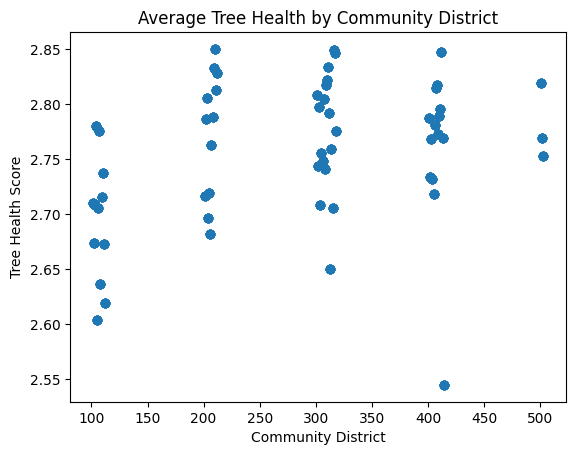

In [39]:
plt.scatter(air_and_tree["cb_num"], air_and_tree["avg_health_score"])
plt.title("Average Tree Health by Community District")
plt.xlabel("Community District")
plt.ylabel("Tree Health Score")
plt.show()


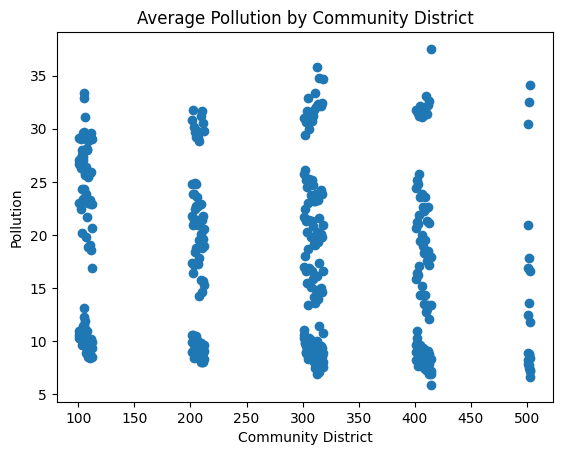

In [40]:
plt.scatter(air_and_tree["cb_num"], air_and_tree["Data_Value"])
plt.title("Average Pollution by Community District")
plt.xlabel("Community District")
plt.ylabel("Pollution")
plt.show()

I can see there is an outlier of a low tree health and an outlier of high pollution.  I am going to explore if these come from the same community district.

In [41]:
air_and_tree.sort_values(by="Data_Value", ascending=False)

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
293,294,414.0,Summer 2015,Ozone (O3),37.5,ppb,56,414,11386,2.5447,7.862,261,109
339,340,313.0,Summer 2015,Ozone (O3),35.8,ppb,37,313,3725,2.6499,10.798,118,91
340,341,315.0,Summer 2015,Ozone (O3),34.8,ppb,39,315,12981,2.7059,14.365,60,117
299,300,318.0,Summer 2015,Ozone (O3),34.7,ppb,42,318,18442,2.7759,15.427,293,127
377,378,503.0,Summer 2015,Ozone (O3),34.1,ppb,59,503,51842,2.7530,9.995,298,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,392,313.0,Winter 2015-16,Fine particles (PM 2.5),6.9,mcg/m3,37,313,3725,2.6499,10.798,118,91
6,7,413.0,Winter 2015-16,Fine particles (PM 2.5),6.9,mcg/m3,55,413,35180,2.7688,13.580,389,129
250,251,414.0,Summer 2015,Nitrogen dioxide (NO2),6.9,ppb,56,414,11386,2.5447,7.862,261,109
405,406,503.0,Summer 2015,Nitrogen dioxide (NO2),6.6,ppb,59,503,51842,2.7530,9.995,298,129


In [42]:
air_and_tree.sort_values(by="avg_health_score", ascending=True)

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
351,352,414.0,Winter 2015-16,Fine particles (PM 2.5),5.9,mcg/m3,56,414,11386,2.5447,7.862,261,109
350,351,414.0,Winter 2015-16,Nitrogen dioxide (NO2),17.9,ppb,56,414,11386,2.5447,7.862,261,109
250,251,414.0,Summer 2015,Nitrogen dioxide (NO2),6.9,ppb,56,414,11386,2.5447,7.862,261,109
23,24,414.0,Annual Average 2015,Nitrogen dioxide (NO2),13.4,ppb,56,414,11386,2.5447,7.862,261,109
213,214,414.0,Summer 2015,Fine particles (PM 2.5),8.3,mcg/m3,56,414,11386,2.5447,7.862,261,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,210.0,Summer 2015,Nitrogen dioxide (NO2),14.6,ppb,22,210,10786,2.8501,11.491,62,110
242,243,210.0,Annual Average 2015,Nitrogen dioxide (NO2),18.8,ppb,22,210,10786,2.8501,11.491,62,110
218,219,210.0,Annual Average 2015,Fine particles (PM 2.5),9.0,mcg/m3,22,210,10786,2.8501,11.491,62,110
20,21,210.0,Winter 2015-16,Nitrogen dioxide (NO2),21.4,ppb,22,210,10786,2.8501,11.491,62,110


In [43]:
cb_414 = air_and_tree[air_and_tree["cb_num"] == 414]
cb_414

,id,Geo_Join_ID,Time_Period,Name,Data_Value,Measure_Info,tree_id,cb_num,tree_count,avg_health_score,dbh_mean,dbh_max,unique_species
23,24,414.0,Annual Average 2015,Nitrogen dioxide (NO2),13.4,ppb,56,414,11386,2.5447,7.862,261,109
212,213,414.0,Annual Average 2015,Fine particles (PM 2.5),7.2,mcg/m3,56,414,11386,2.5447,7.862,261,109
213,214,414.0,Summer 2015,Fine particles (PM 2.5),8.3,mcg/m3,56,414,11386,2.5447,7.862,261,109
250,251,414.0,Summer 2015,Nitrogen dioxide (NO2),6.9,ppb,56,414,11386,2.5447,7.862,261,109
293,294,414.0,Summer 2015,Ozone (O3),37.5,ppb,56,414,11386,2.5447,7.862,261,109
350,351,414.0,Winter 2015-16,Nitrogen dioxide (NO2),17.9,ppb,56,414,11386,2.5447,7.862,261,109
351,352,414.0,Winter 2015-16,Fine particles (PM 2.5),5.9,mcg/m3,56,414,11386,2.5447,7.862,261,109


In [44]:

borough_df = tree_df.groupby("boroname").agg({
    "spc_common": "nunique",
    "tree_dbh": ["mean", "sum"],
    "health_score": "mean",
    "tree_id": "count"}).reset_index()
borough_df.columns = ["boroname", "unique_species", "avg_dbh", "total_dbh", "avg_health_score", "total_trees"]

borough_df["avg_dbh"] = borough_df["avg_dbh"].round(3)
borough_df["avg_health_score"] = borough_df["avg_health_score"].round(4)

borough_df.head()

,boroname,unique_species,avg_dbh,total_dbh,avg_health_score,total_trees
0,Bronx,132,10.083,812562,2.7881,80584
1,Brooklyn,132,12.165,2064944,2.7762,169744
2,Manhattan,128,8.635,531005,2.6972,61495
3,Queens,132,13.099,3117148,2.7757,237970
4,Staten Island,131,10.799,1095489,2.7732,101442


In [45]:
borough_df.to_csv("borough_tree.csv", index=False)